In [1]:
import numpy as np
from keras.preprocessing import image
from keras.models import load_model
import matplotlib.pyplot as plt
import tensorflow.python as tf

def load_image(path, target_size=(240, 320)):
    x = image.load_img(path, target_size=target_size)
    x = image.img_to_array(x)
    x = np.expand_dims(x, axis=0)
    return x

1/1 [==============================] - 0s 116ms/step


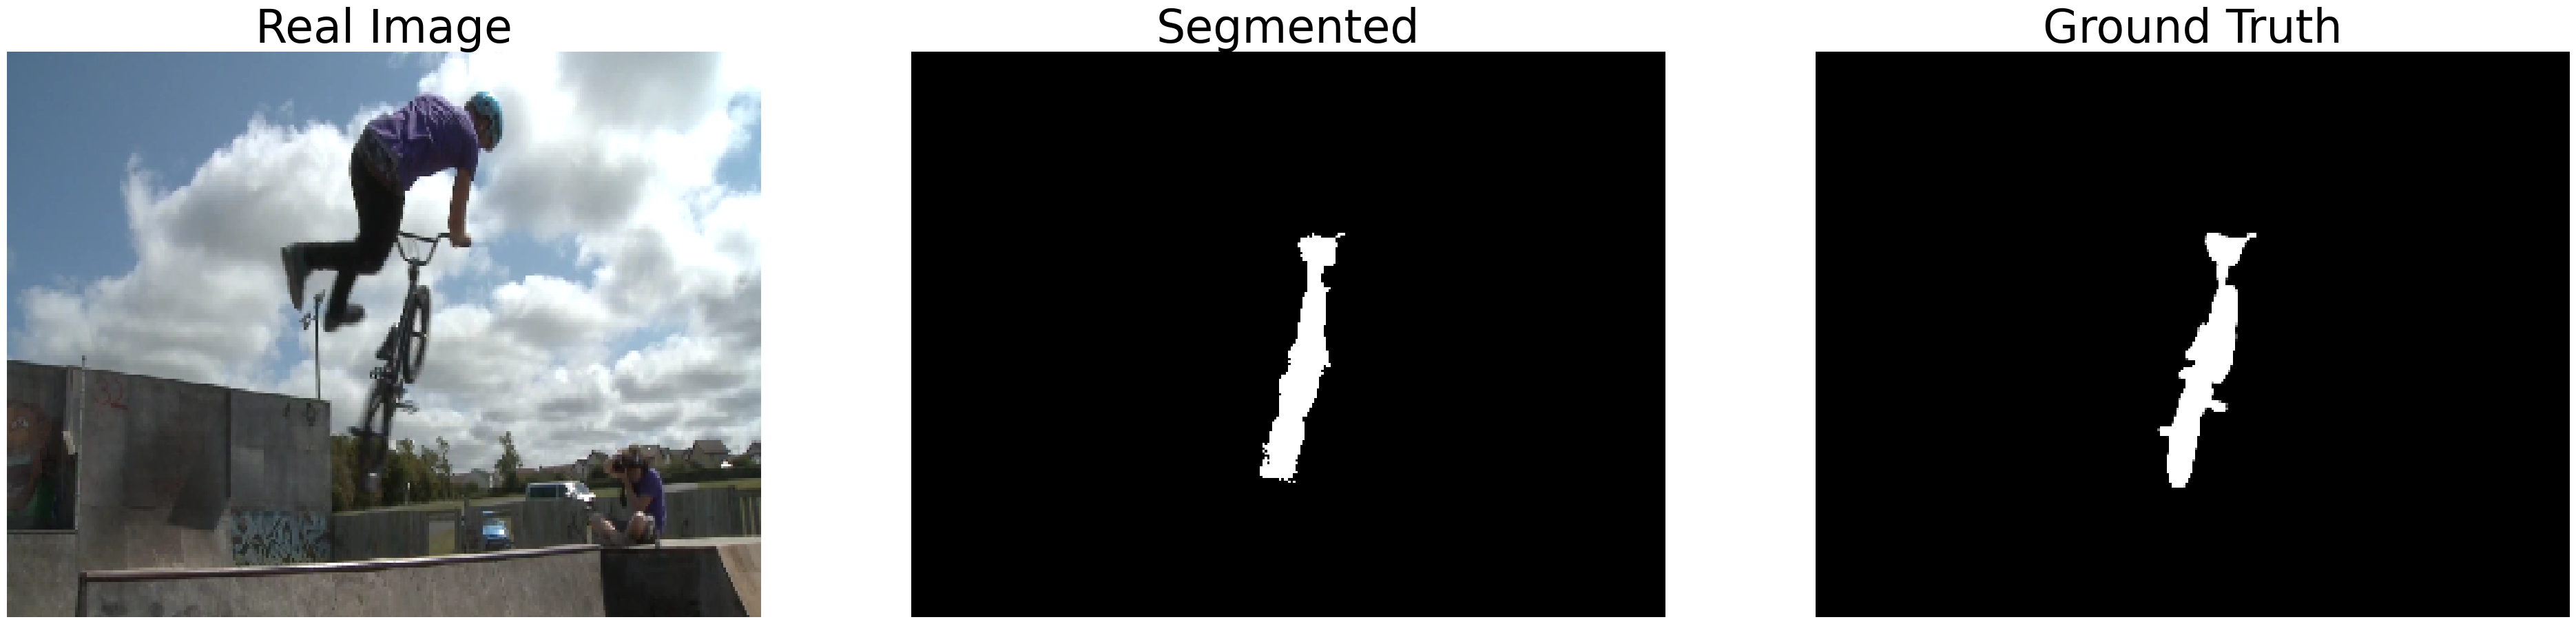

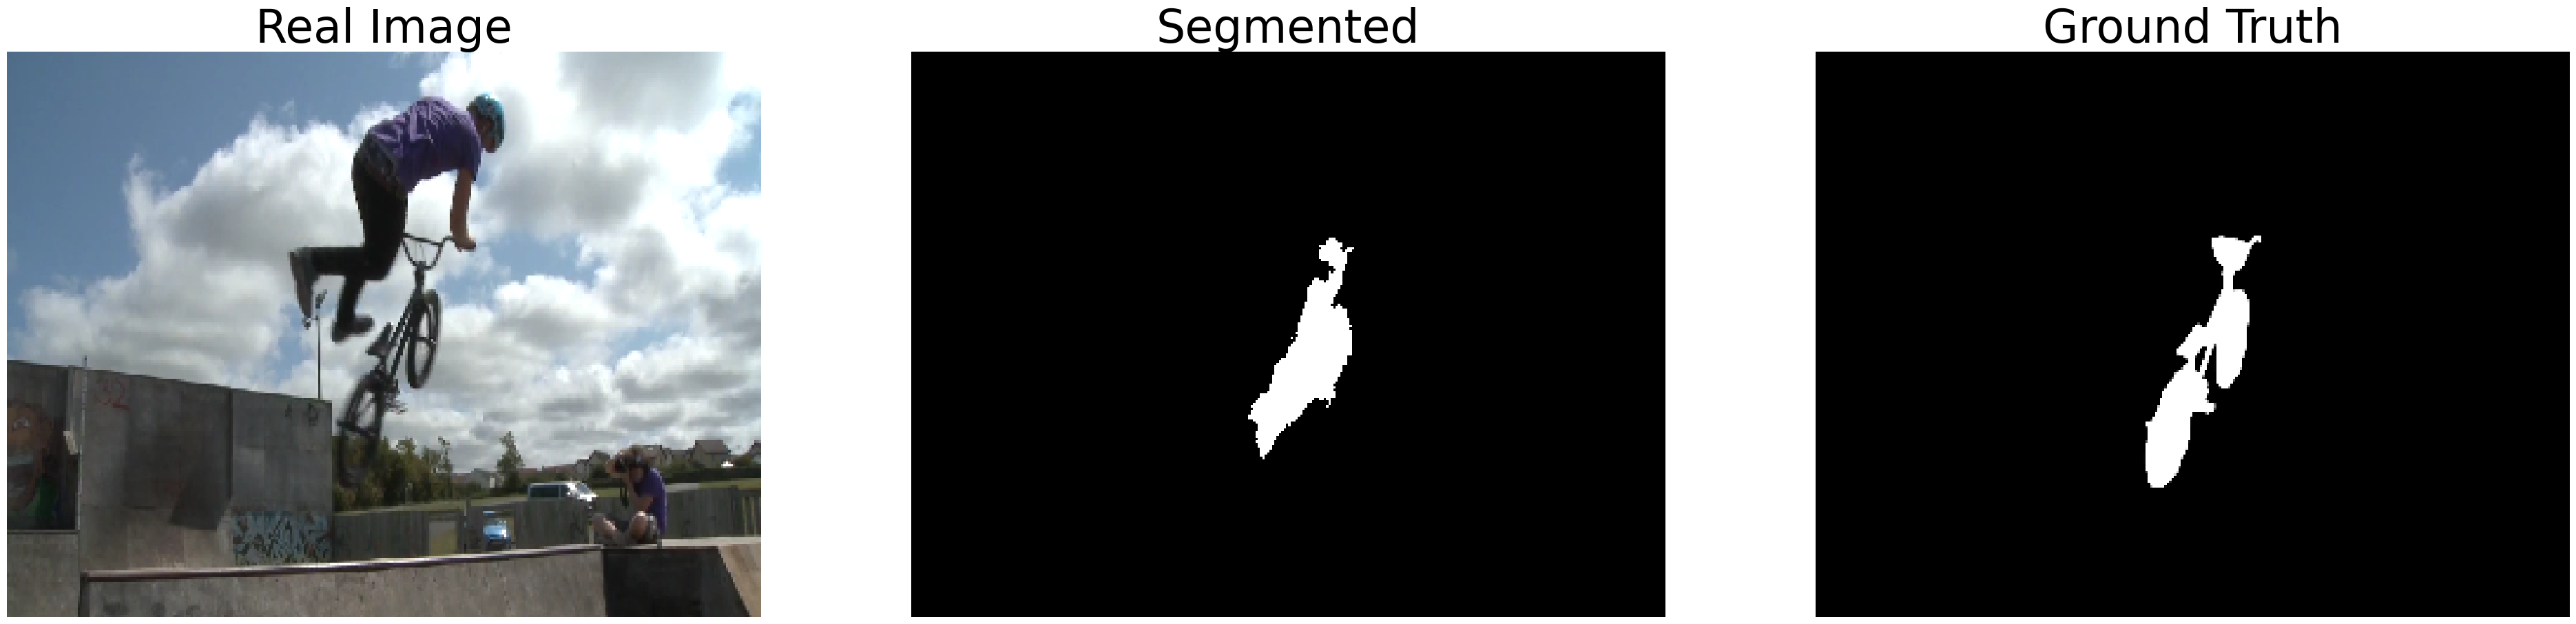

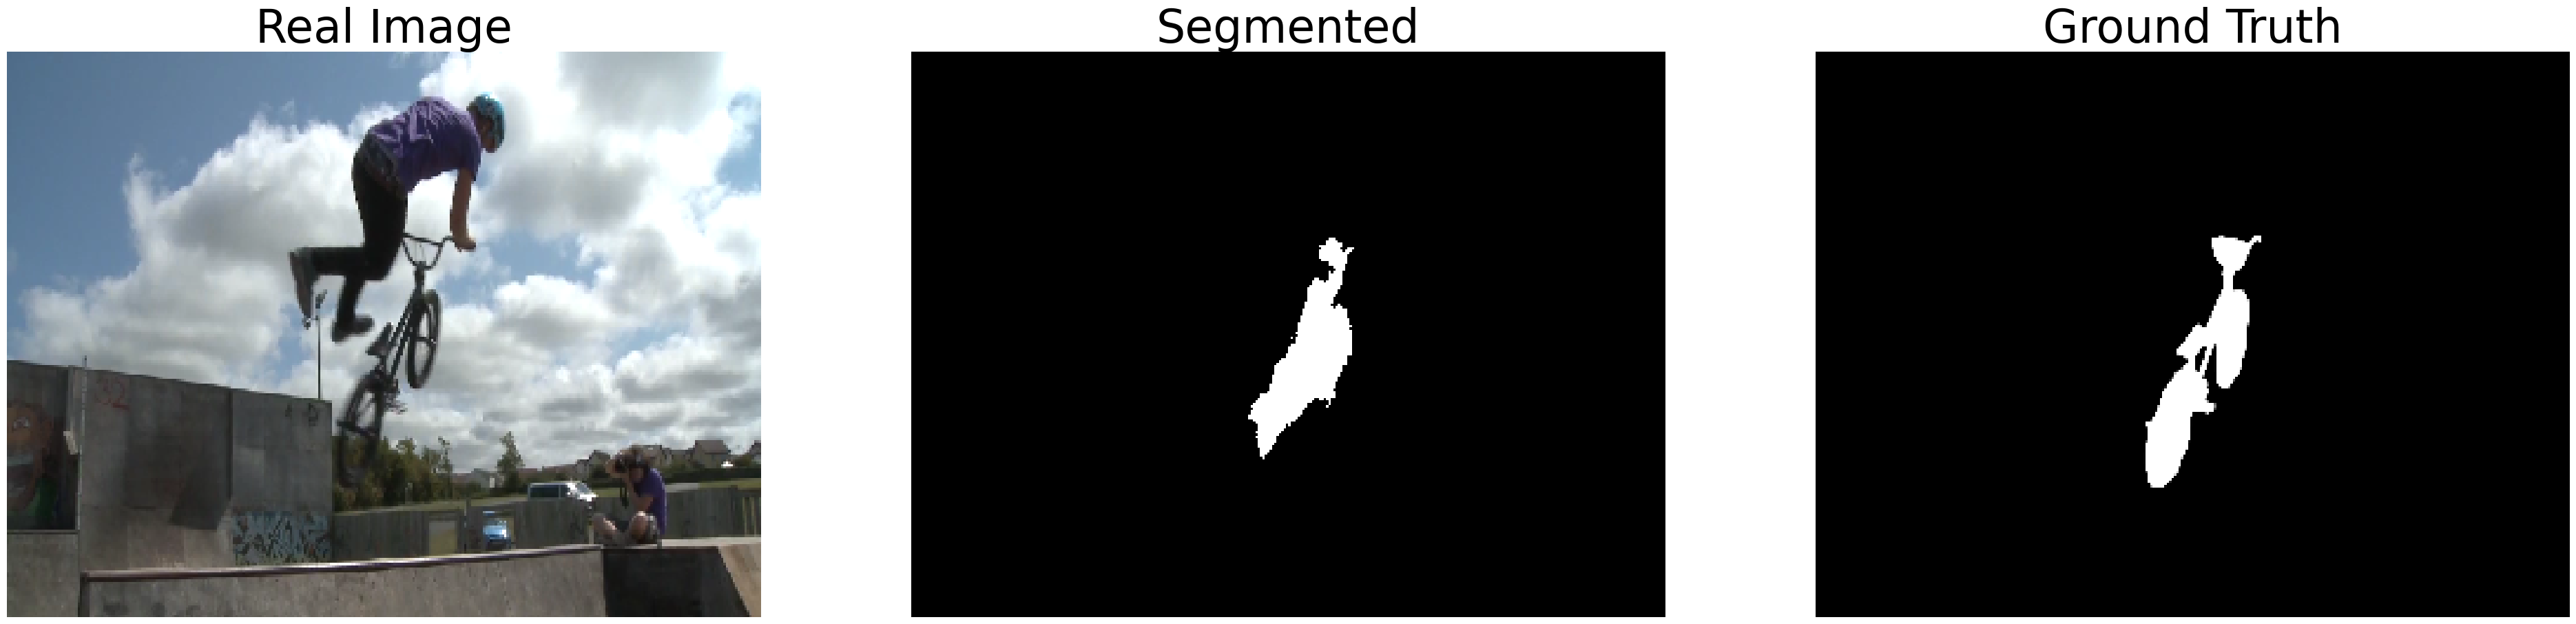

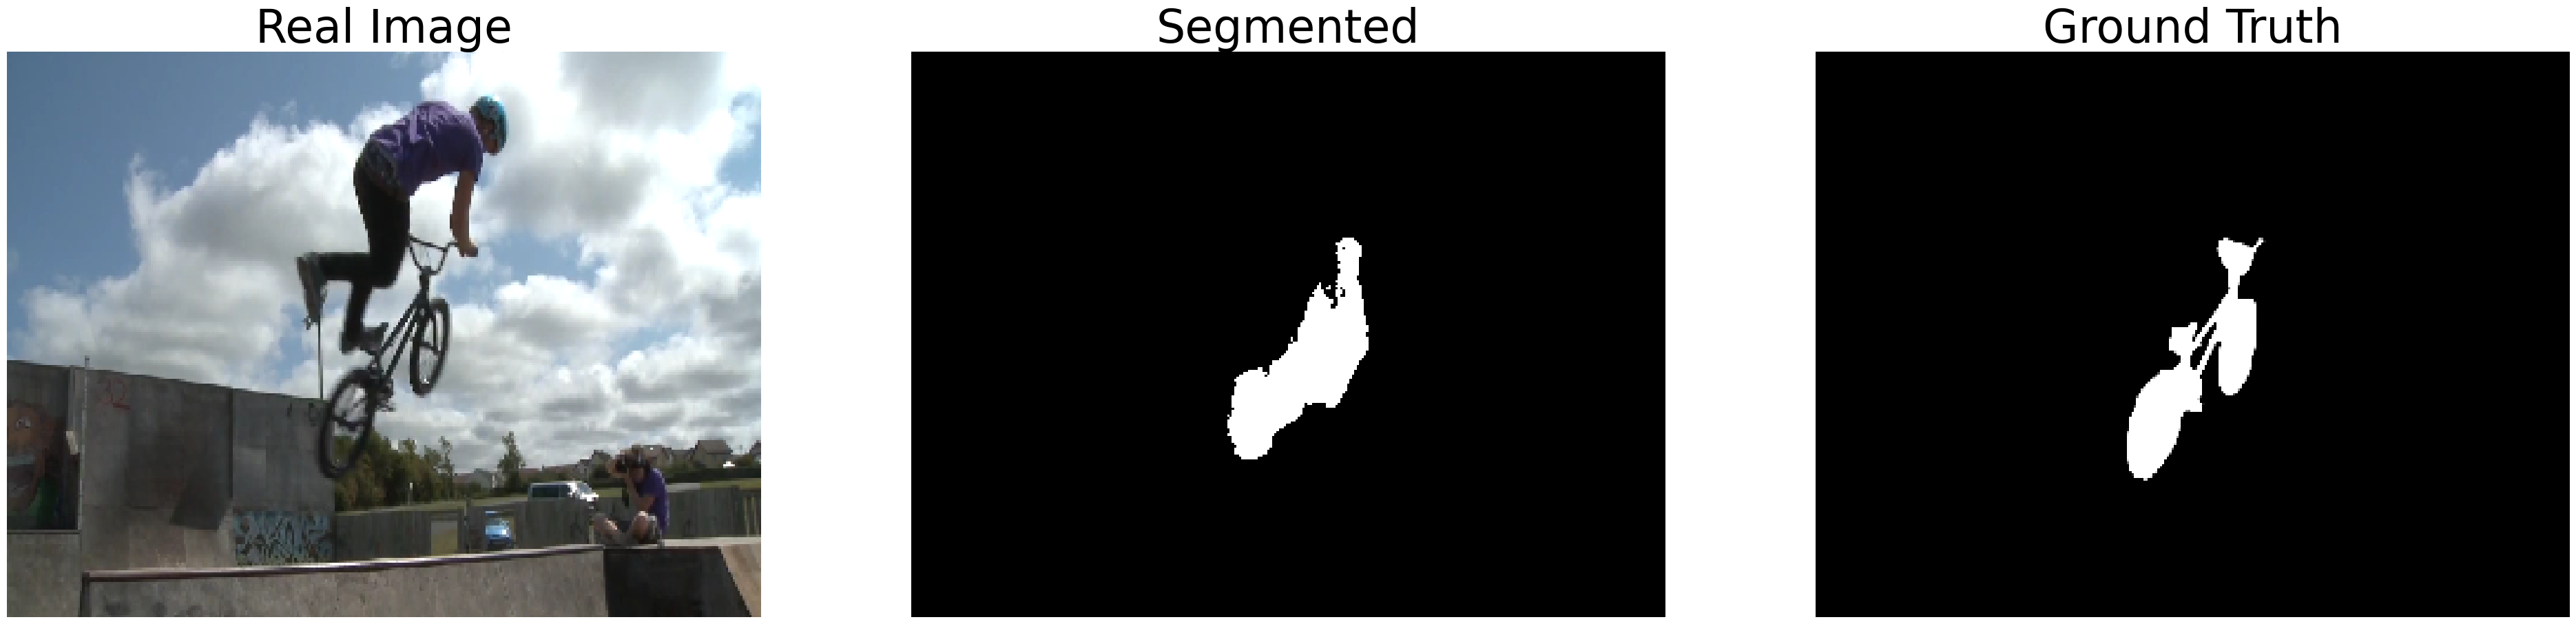

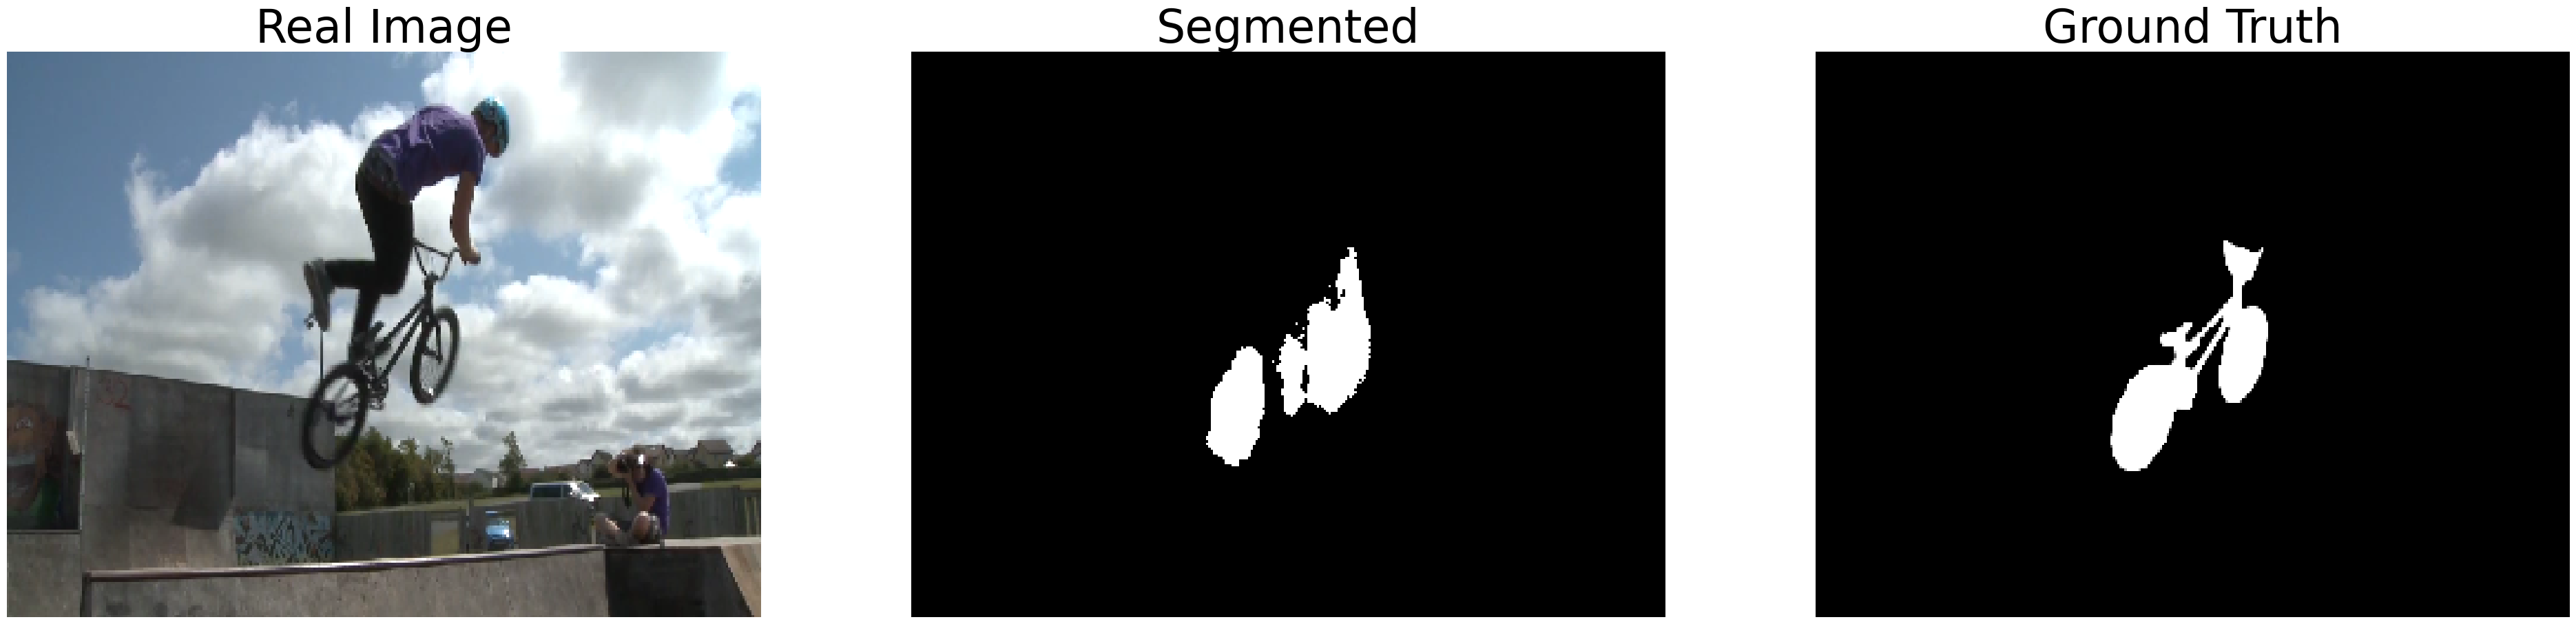

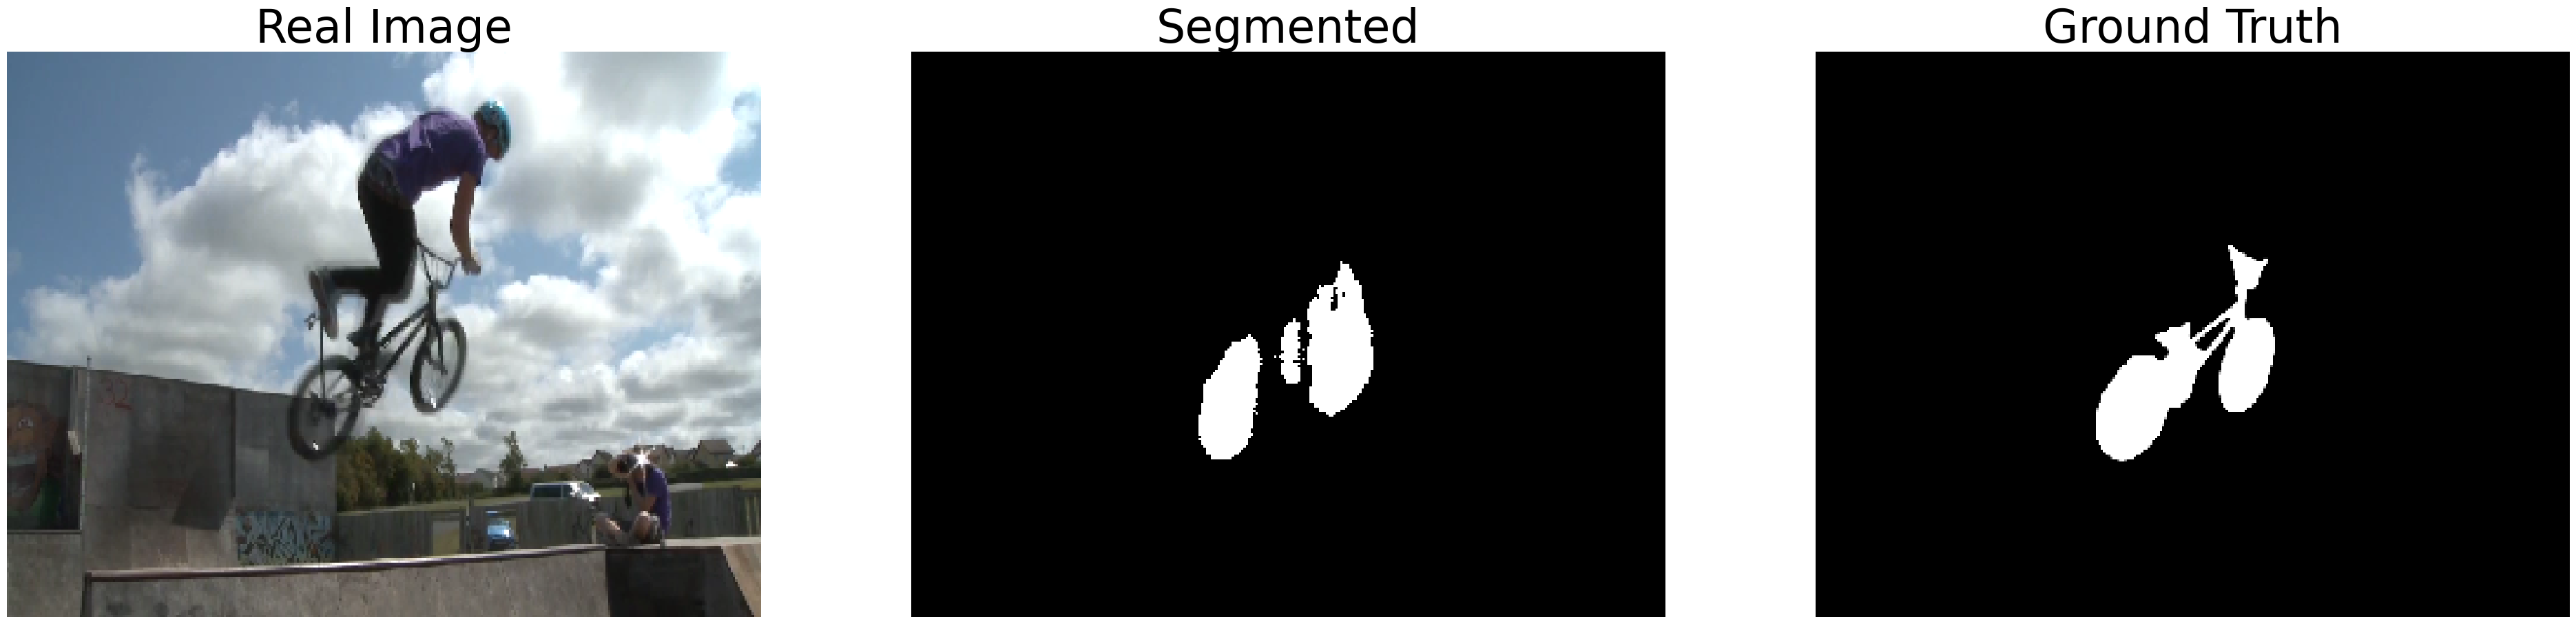

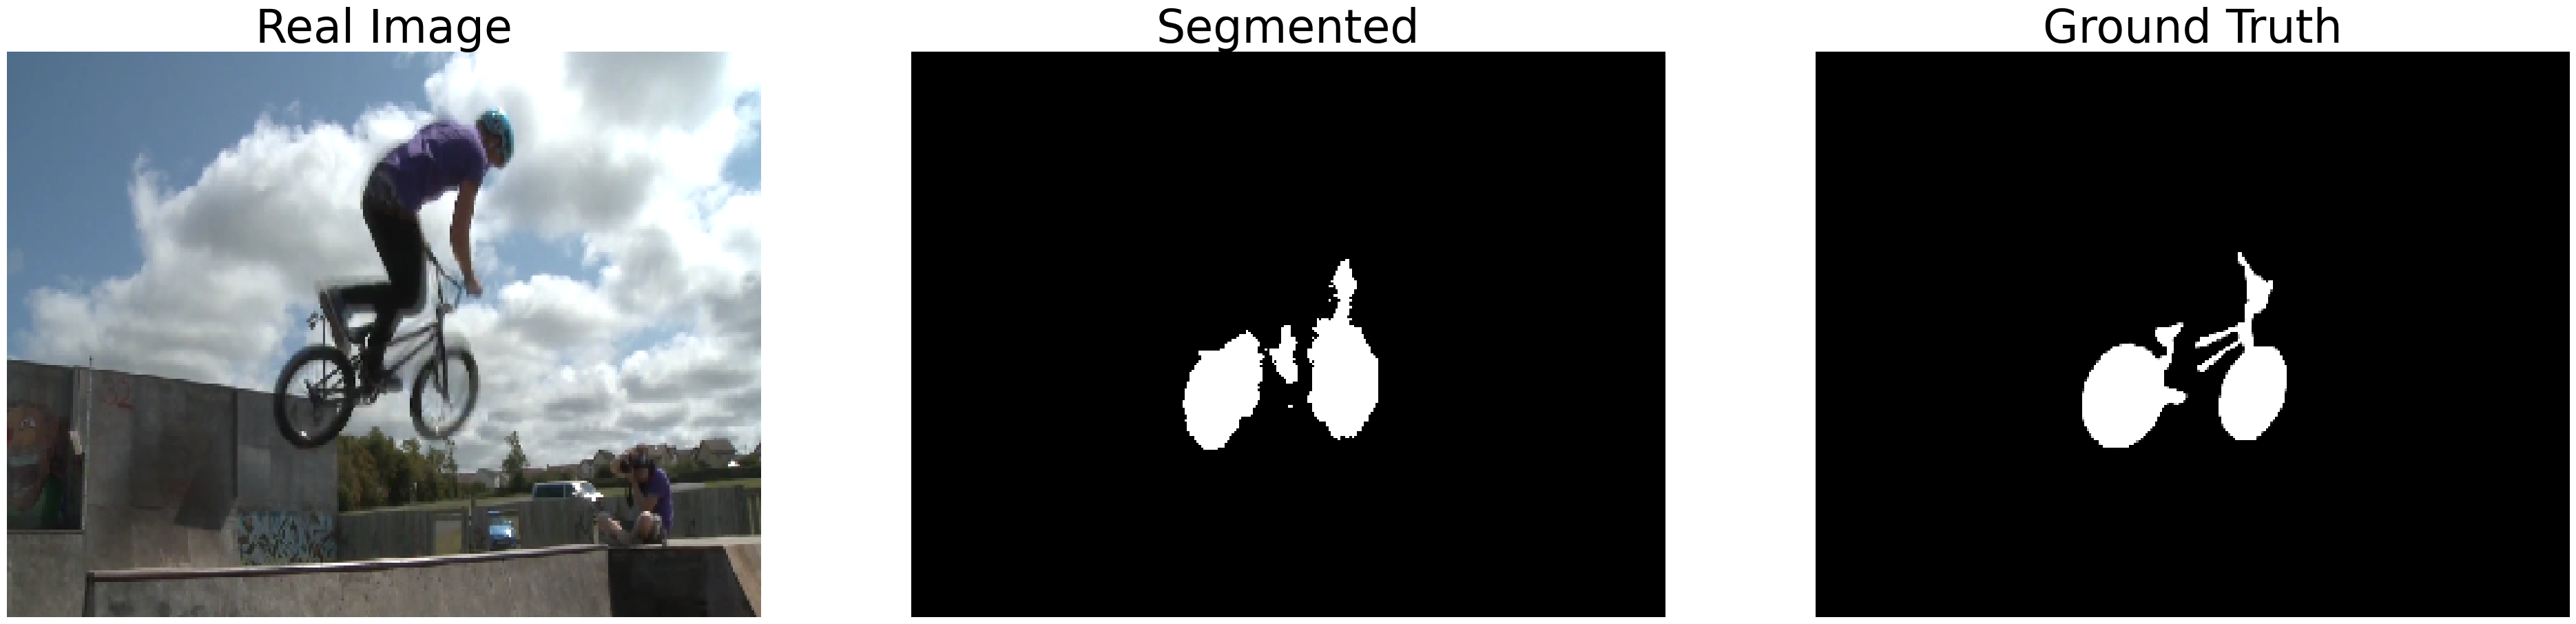

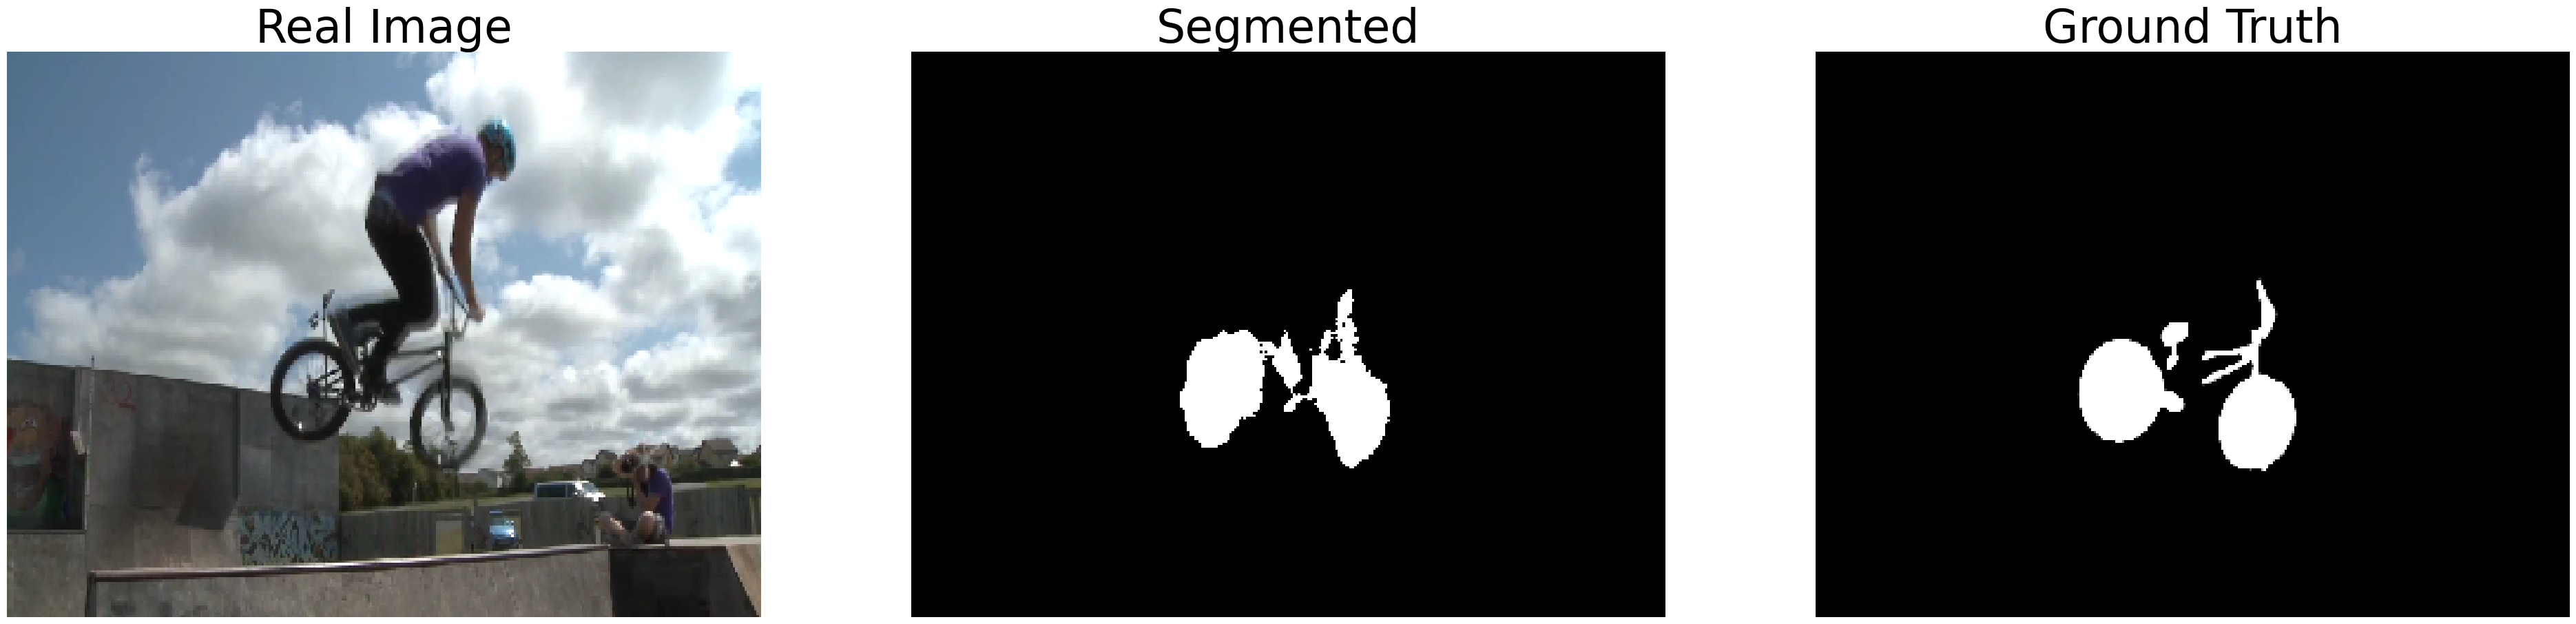

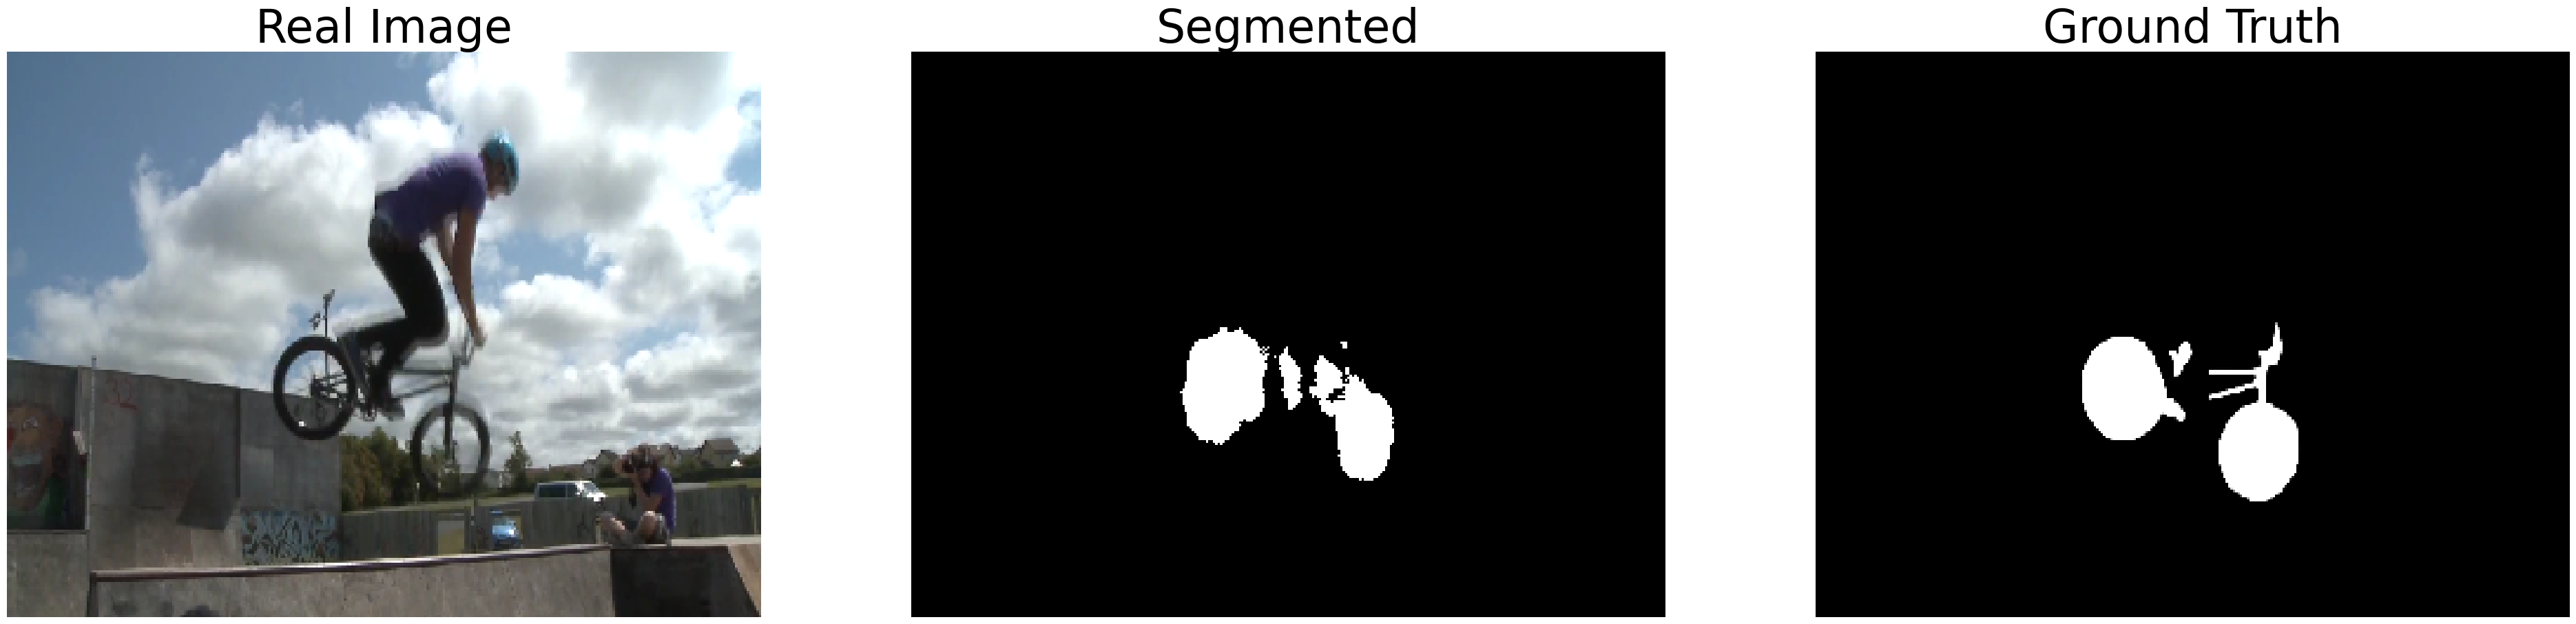

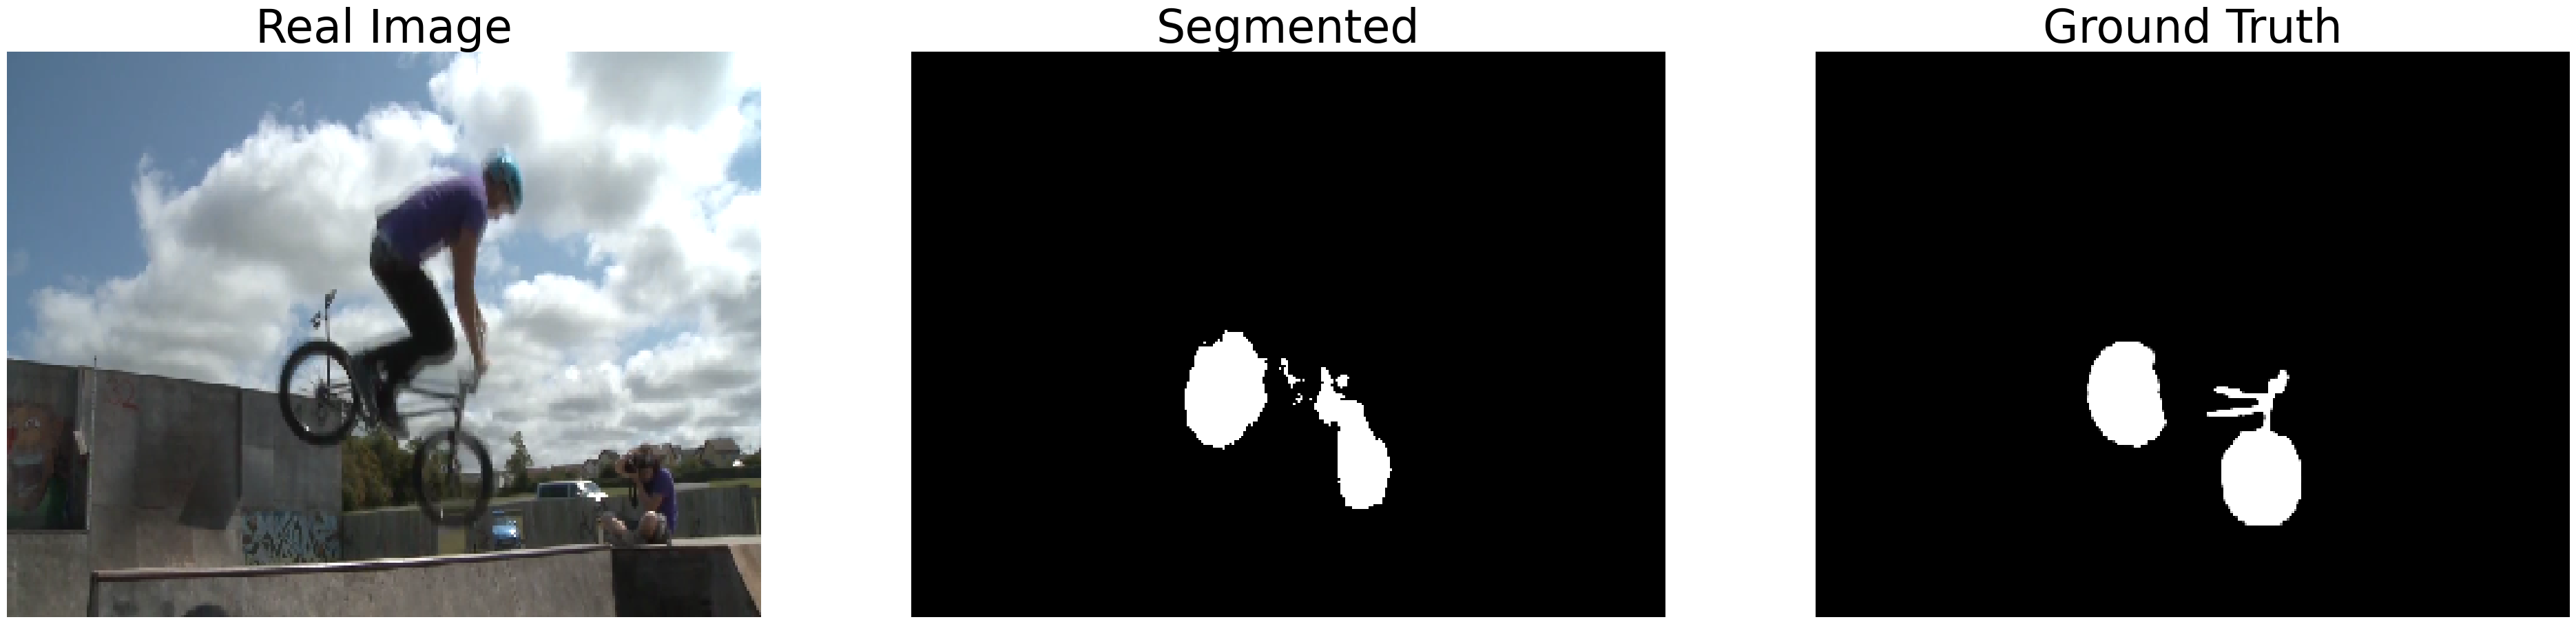

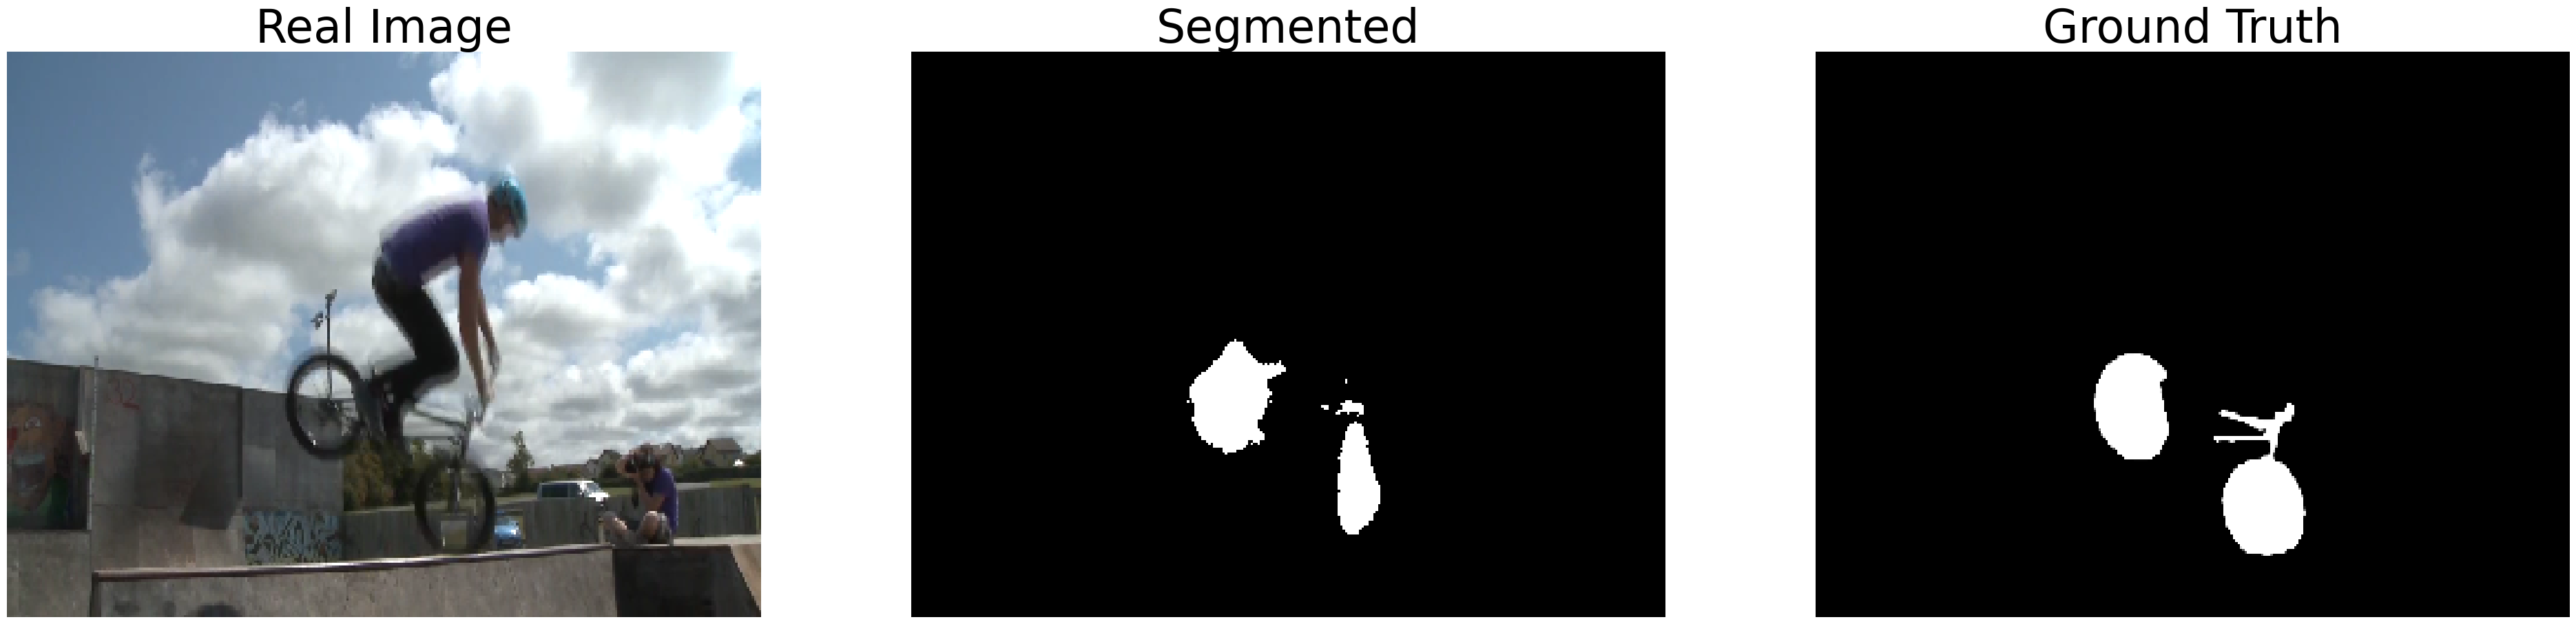

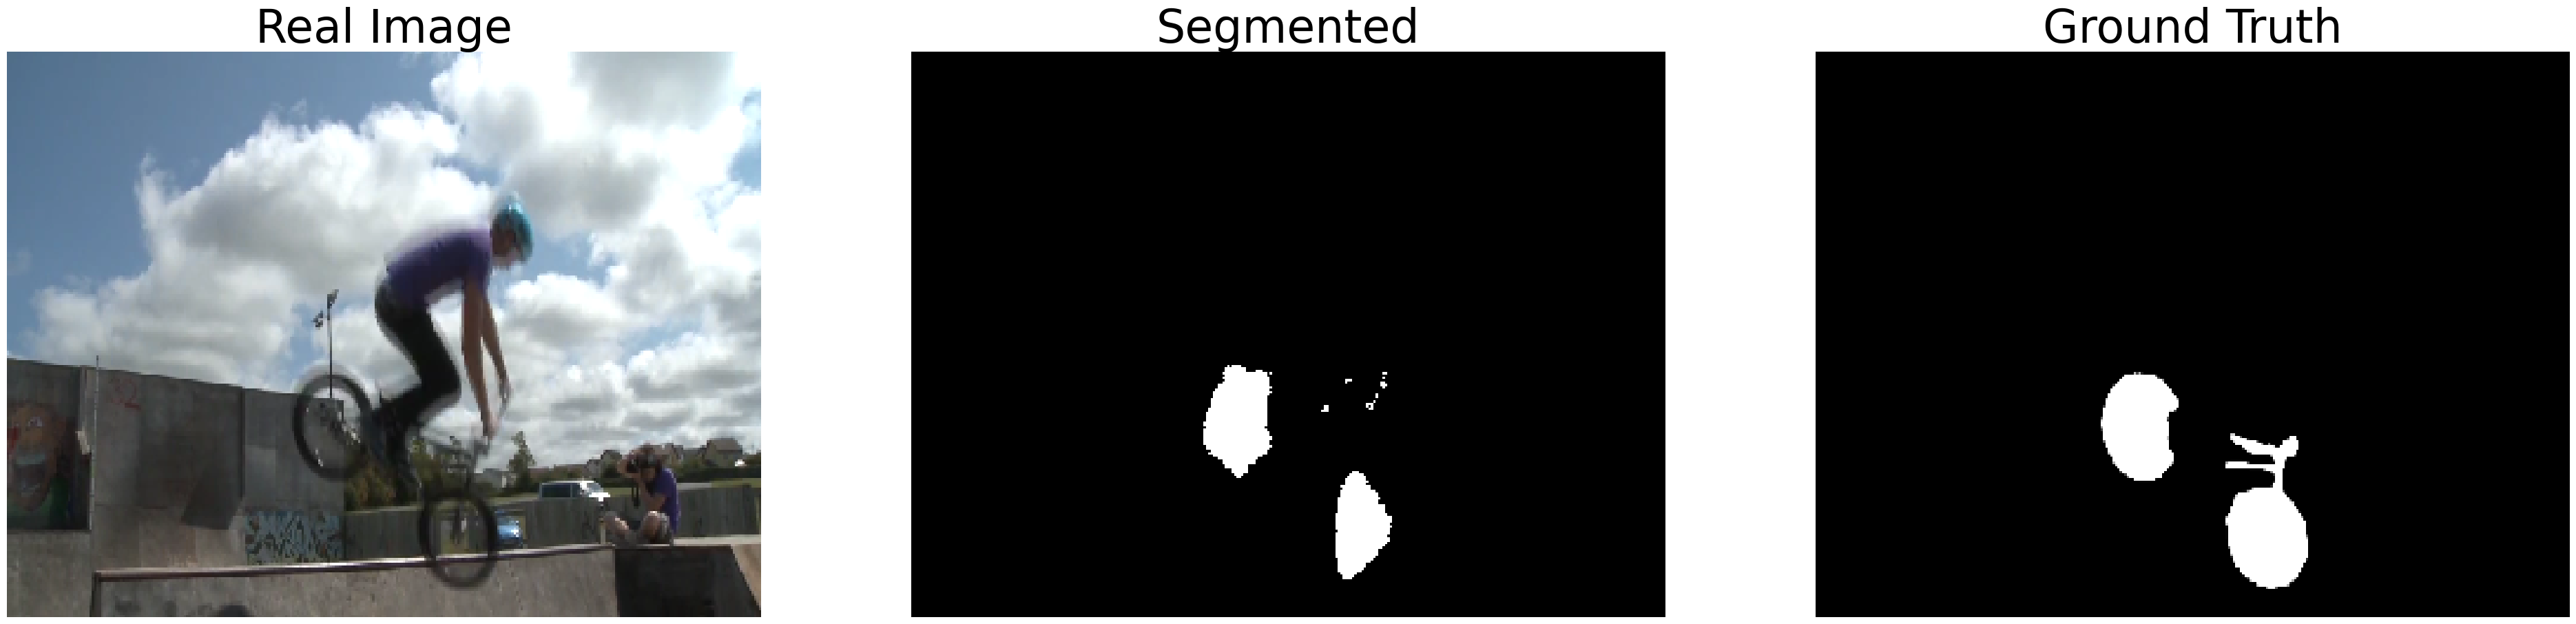

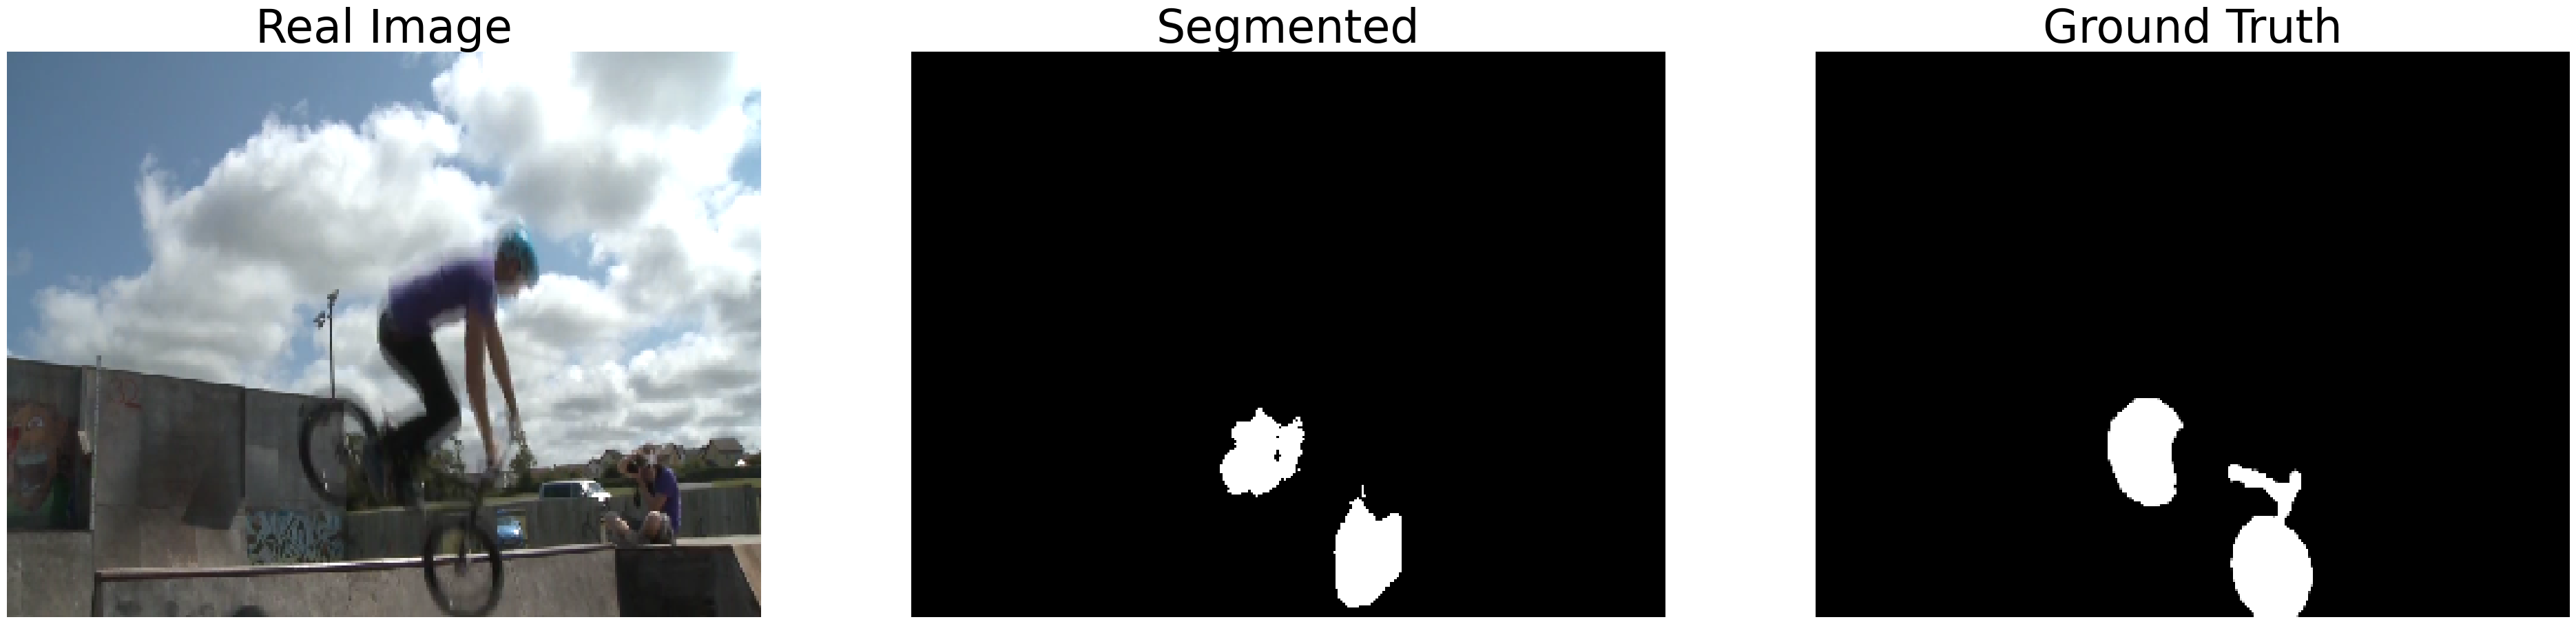

In [38]:
MODEL_PATH = './weights/trained_weights.h5'
model = load_model(MODEL_PATH) #load the trained model

num_sample = 13

for idx in range(num_sample):

    IMAGE_PATH = f'./dataset/test/x/bmx_0{6691 + idx}.png'
    TRUTH_PATH = f'./dataset/test/y/bmx_0{6691 + idx}.png'
    x = load_image(IMAGE_PATH) # load a test frame
    y = load_image(TRUTH_PATH)
    

    probs = model.predict(x, batch_size=1, verbose=1)

    probs = probs.reshape([probs.shape[1], probs.shape[2]])

    plt.figure(figsize=(240/5, 320/5))

    plt.subplot(1, 3, 1)
    plt.imshow(np.uint8(x.squeeze()))
    plt.axis('off') 
    plt.title('Real Image', fontsize=48)


    plt.subplot(1, 3, 2)
    plt.imshow(np.uint8(np.round(probs)))
    plt.axis('off') 
    plt.title('Segmented', fontsize=48)

    plt.subplot(1, 3, 3)
    plt.imshow(np.uint8(y.squeeze()))
    plt.axis('off') 
    plt.title('Ground Truth', fontsize=48)

plt.show()